In [ ]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
import neuromaps

In [2]:
print("neuromaps version:", neuromaps.__version__)

neuromaps version: 0.0.5+41.gf0ed67c


In [6]:
## run if needed
# pip install neuromaps brainspace
# pip install statsmodels

In [3]:
# Add more imports if needed

from neuromaps.datasets import fetch_atlas ## used to access the templates for the coordinate system
import nibabel as nib ## used to load system dictionary per key
from neuromaps.datasets import available_annotations ## repository of brain maps - spatial maps representing some
from neuromaps.datasets import available_tags ## most annotations have “tags” that help to describe the data they represent
from neuromaps.datasets import fetch_annotation
from neuromaps.datasets import fetch_fsaverage

from neuromaps import transforms
import netneurotools
# possibly need
from netneurotools import datasets as nntdata
from neuromaps import parcellate
from neuromaps.parcellate import Parcellater
from neuromaps.images import dlabel_to_gifti
# plotting 
from neuromaps.images import load_data
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from neuromaps import plotting
from nilearn import plotting
import numpy as np
import pandas as pd
# sampling
from neuromaps import datasets, images, nulls, resampling
from neuromaps.resampling import resample_images
from neuromaps.stats import compare_images
from neuromaps import stats
from nilearn.datasets import fetch_atlas_surf_destrieux
from neuromaps.nulls import alexander_bloch
from neuromaps.stats import compare_images
from scipy.stats import pearsonr

from nilearn.surface import load_surf_mesh
from brainspace.null_models import SpinPermutations
from nilearn.surface import InMemoryMesh, PolyMesh
from nilearn.surface import SurfaceImage
from nilearn.plotting import view_surf

import time
# from neuromaps.stats import fdr_correct
# for FDR
from statsmodels.stats.multitest import multipletests

In [8]:
for annotation in available_annotations():
    print(annotation)

('abagen', 'genepc1', 'fsaverage', '10k')
('aghourian2017', 'feobv', 'MNI152', '1mm')
('alarkurtti2015', 'raclopride', 'MNI152', '3mm')
('bedard2019', 'feobv', 'MNI152', '1mm')
('beliveau2017', 'az10419369', 'MNI152', '1mm')
('beliveau2017', 'az10419369', 'fsaverage', '164k')
('beliveau2017', 'cimbi36', 'MNI152', '1mm')
('beliveau2017', 'cimbi36', 'fsaverage', '164k')
('beliveau2017', 'cumi101', 'MNI152', '1mm')
('beliveau2017', 'cumi101', 'fsaverage', '164k')
('beliveau2017', 'dasb', 'MNI152', '1mm')
('beliveau2017', 'dasb', 'fsaverage', '164k')
('beliveau2017', 'sb207145', 'MNI152', '1mm')
('beliveau2017', 'sb207145', 'fsaverage', '164k')
('castrillon2023', 'cmrglc', 'MNI152', '3mm')
('ding2010', 'mrb', 'MNI152', '1mm')
('dubois2015', 'abp688', 'MNI152', '1mm')
('dukart2018', 'flumazenil', 'MNI152', '3mm')
('dukart2018', 'fpcit', 'MNI152', '3mm')
('fazio2016', 'madam', 'MNI152', '3mm')
('finnema2016', 'ucbj', 'MNI152', '1mm')
('gallezot2010', 'p943', 'MNI152', '1mm')
('gallezot2017',

In [ ]:
## 5ht1a brain map
('savli2012', 'way100635', 'MNI152', '3mm')

## Maybe add more receptor maps
('smart2019', 'abp688', 'MNI152', '1mm') # ABP688 mGluR5 - controls the ability for the brain to rewire its connections and learn new things
('turtonen2020', 'carfentanil', 'MNI152', '1mm') # Carfentanil MOR - endorphins, responsible for feelings of euphoria & pain
...('kantonen2020', 'carfentanil', 'MNI152', '3mm')  #??

# other brain maps
# Physical maps
('abagen', 'genepc1', 'fsaverage', '10k')
('hcps1200', 'myelinmap', 'fsLR', '32k')
('hcps1200', 'thickness', 'fsLR', '32k')
('hill2010', 'devexp', 'fsLR', '164k')
# Chemical maps
('margulies2016', 'fcgradient01', 'fsLR', '32k')
('raichle', 'cmrglc', 'fsLR', '164k')
('mueller2013', 'intersubjvar', 'fsLR', '164k')

In [9]:
mni152 = fetch_atlas('MNI152', '3mm')
print(sorted(mni152))

['2009cAsym_CSF', '2009cAsym_GM', '2009cAsym_PD', '2009cAsym_T1w', '2009cAsym_T2w', '2009cAsym_WM', '2009cAsym_brainmask']


In [13]:
five_ht1a = fetch_annotation(source='savli2012', desc='way100635', space='MNI152', den='3mm')


[References] Please cite the following papers if you are using this data:

  For {'source': 'savli2012', 'desc': 'way100635', 'space': 'MNI152', 'res': '3mm'}:
  [primary]:
    Markus Savli, Andreas Bauer, Markus Mitterhauser, Yu-Shin Ding, Andreas Hahn, Tina Kroll, Alexander Neumeister, Daniela Haeusler, Johanna Ungersboeck, Shannan Henry, and others. Normative database of the serotonergic system in healthy subjects using multi-tracer pet. Neuroimage, 63(1):447–459, 2012.
  [secondary]:
    


In [ ]:
fslr = transforms.mni152_to_fslr(five_ht1a, '32k')
fslr
#The returned fslr object is a tuple of nib.GiftiImage objects corresponding to data from the (left, right) hemisphere. 
# These data can be accessed via the .agg_data() method on the image objects:

(<nibabel.gifti.gifti.GiftiImage at 0x156a4c210>,
 <nibabel.gifti.gifti.GiftiImage at 0x156b6a610>)

In [18]:
fslr_lh, fslr_rh = fslr
print(fslr_lh.agg_data().shape)

(32492,)


/var/folders/ff/1nvxwnl16fs1my8jhytzdqxw0000gn/T/ipykernel_26599/3364083453.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


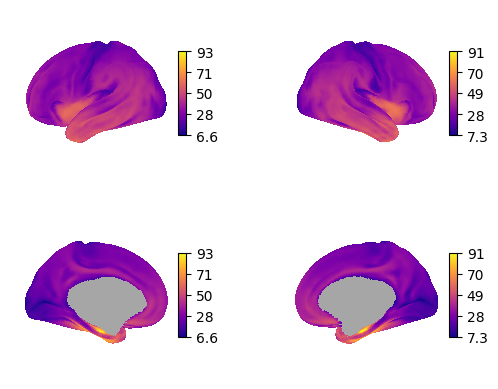

In [ ]:
fig = plotting.plot_surf_template(
    data=fslr,
    template='fsLR',
    density='32k',
    surf='inflated',          
    cmap='plasma',
    colorbar=True,
)
fig.suptitle("5HT1a (fsLR 32k)", fontsize=16, y=0.9)
fig.show()

In [21]:
five_ht1a_data = load_data(fslr)
five_ht1a_data

array([37.421368, 27.300804, 23.448963, ..., 44.939358, 44.68842 ,
       43.892735], shape=(64984,), dtype=float32)